<a href="https://colab.research.google.com/github/Aswin-S-Aswin/MachineLearning_MedicalReport/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression and Gradient Descent

#### ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

In [ ]:
!pip install pandas --quiet

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

from urllib.request import urlretrieve
import pandas as pd
import csv
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x781c5bf14490>)

In [ ]:
medical_df=pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


###Data information


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###Libraries

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

###Count

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig=px.histogram(medical_df,
                 x='age',
                 marginal='box',
                 nbins=47,
                 title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()

###BMI

In [ ]:
fig=px.histogram(medical_df,
                 x='bmi',
                 marginal='box',
                 color_discrete_sequence=['orange']
                 ,title='Distribution of BMI'
                 )
fig.update_layout(bargap=0.1)
fig.show()

###Changes

In [ ]:
fig=px.histogram(medical_df,
                 x='charges',
                 marginal='box',
                 color='smoker',
                 color_discrete_sequence=['green','grey'],
                 title='Annual Medical Charges')
fig.update_layout(bargap=.1)
fig.show()

###Smoker count

In [ ]:
#to find count
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


###**Exersice**:Visyalize the distribution of medical charges in connection with other factors like "sex' and "region".What do you observe?

In [ ]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')

In [ ]:
fig=px.histogram(medical_df,
                 x='smoker',
                 color='region',
                #  marginal='box',
                 color_discrete_sequence=['red','blue'],
                 title='Sex and Region')
fig.update_layout(bargap=.1)
fig.show()

###Age and Charges

In [ ]:
fig=px.scatter(medical_df,
               x='age',
               y='charges',
               color='smoker',
               title='Age and Charges',
               hover_data=['sex'])
fig.update_traces(marker_size=5)
fig.show()

###BMI and Charges Based on smoker

In [ ]:
fig=px.scatter(medical_df,
               x='bmi',
               y='charges',
               color='smoker',
               hover_data=['sex'],
               title='BMI and Charges')
fig.update_traces(marker_size=5)
fig.show()

###Violin Chart

In [ ]:
px.violin(medical_df,x='children',y='charges')

###Correlation


In [ ]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [ ]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [ ]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [ ]:
smoker_v={'yes':1,'no':0}
smoker_num=medical_df.smoker.map(smoker_v)
display(smoker_num)

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
medical_df.charges.corr(smoker_num)

np.float64(0.787251430498478)

###Catergorical to numerical for correlation

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
medical_df_encoded = pd.get_dummies(medical_df, columns=['sex', 'smoker', 'region'], drop_first=True)
display(medical_df_encoded.corr())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


In [ ]:
medical_df_encoded = pd.get_dummies(medical_df, drop_first=True)
corr_matrix = medical_df_encoded.corr()
display(corr_matrix)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


###Analysis only for Non-Smokers

In [ ]:
non_smoker=medical_df[medical_df.smoker=='no']

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

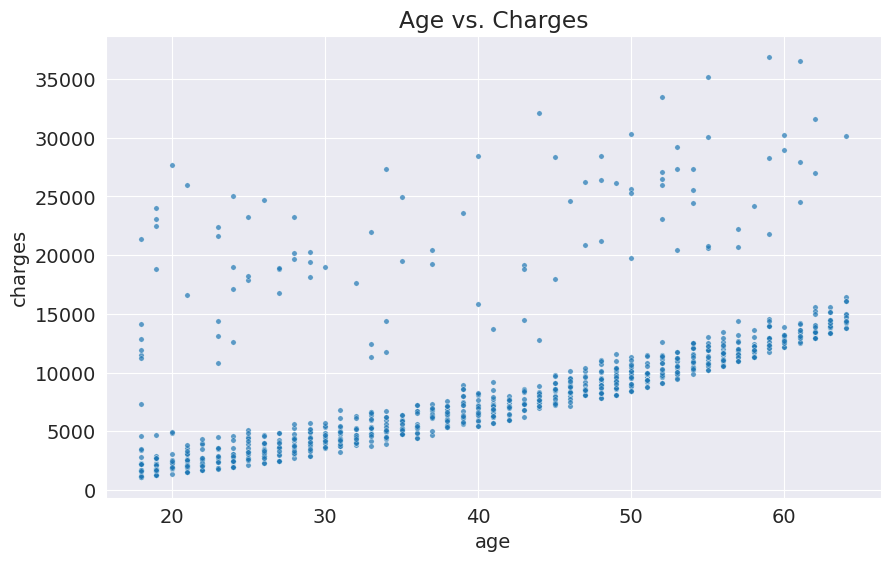

In [ ]:
plt.title('Age vs. Charges')
sns.scatterplot(non_smoker, x='age', y='charges', alpha=0.7, s=15)

Now we are going to use line rule of
        y=mx+c

    y=Target
    x=slope
    x=input value
    c=intercept







In [ ]:
w=50
b=100

#### Estimator-df

In [ ]:
def estimator_df(age,w,b):
  return w*age+b

In [ ]:
ages=non_smoker.age
display(ages)

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
estimator_df(40,w,b)

2100

In [ ]:
estimator_ages=estimator_df(ages,w,b)

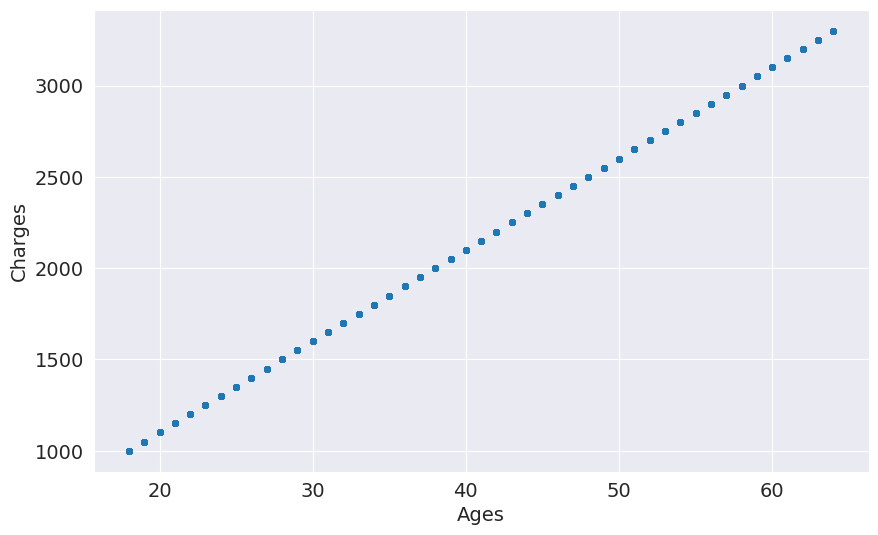

In [ ]:
plt.scatter(ages,estimator_ages,alpha=0.7,s=15)
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.show()

#### Try_parameter

In [ ]:
def try_parameter(w,b):
  ages=non_smoker.age
  target=non_smoker.charges
  esrimated_charges=estimator_df(ages,w,b)
  plt.plot(ages,esrimated_charges,'r',alpha=0.7)
  plt.scatter(ages,target,alpha=0.7,s=15)
  plt.xlabel('Ages')
  plt.ylabel('Charges')
  plt.legend(['Estimator','Actual'])
  plt.show()

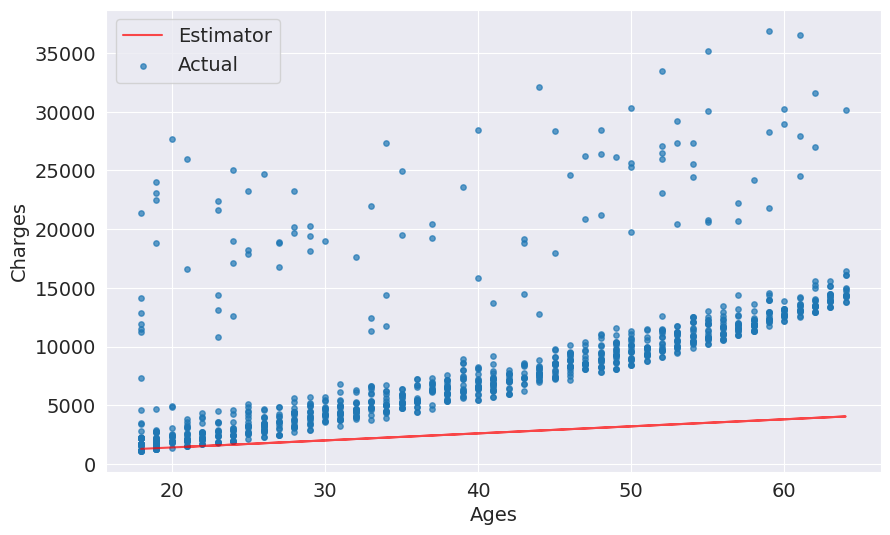

In [ ]:
try_parameter(60,200)

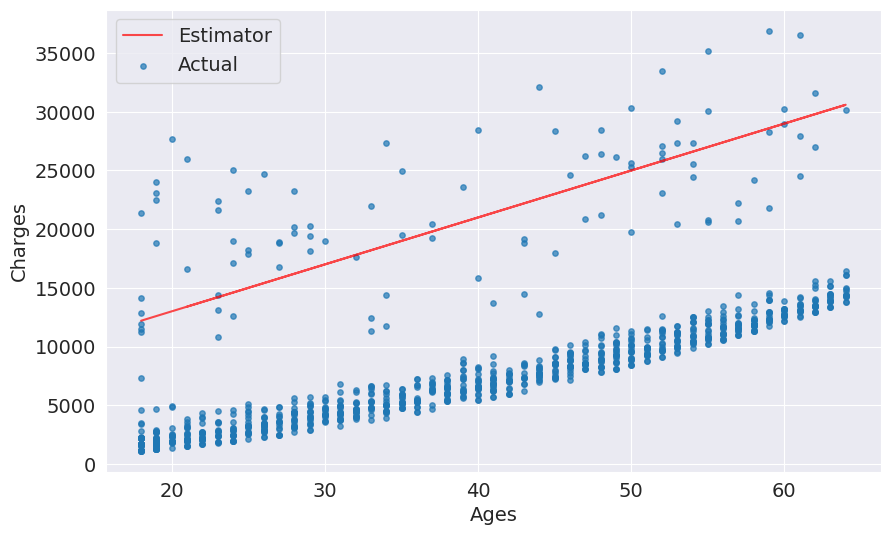

In [ ]:
try_parameter(400,5000)

###Root Mean Square Error

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
targents=non_smoker['charges']
prdicted=estimator_df(non_smoker.age,w,b)

In [ ]:
rmse(targents,prdicted)

np.float64(8461.949562575493)

In [ ]:
def try_parameters(w,b):
  ages=non_smoker.age
  target=non_smoker.charges
  predictions=estimator_df(ages,w,b)

  plt.plot(ages,predictions,'r',alpha=0.9)
  plt.scatter(ages,target,alpha=0.7,s=15)
  plt.xlabel('Ages')
  plt.ylabel('Charges')
  plt.legend(['Estimator','Actual'])
  plt.show()

  loss=rmse(target,predictions)
  print('Loss:',loss)

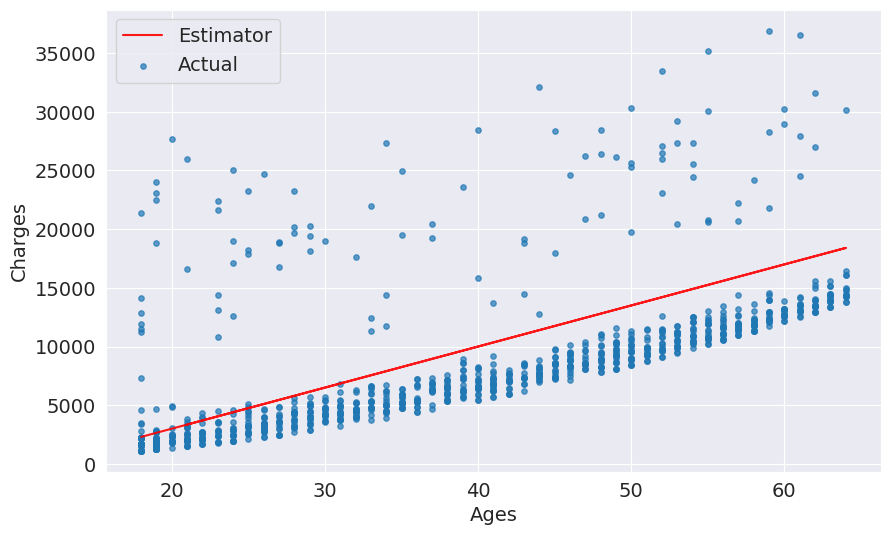

Loss: 4991.993804156943


In [ ]:
try_parameters(350,- 4000)

###Linear Regression

In [ ]:
!pip install scikit-learn --quiet

First import linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker[['age']]
targets = non_smoker.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [ ]:
model.fit(inputs,targets)

LinearRegression()

In [ ]:
model.predict(pd.DataFrame(np.array([[23],[37],[61]]), columns=['age']))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions=model.predict(inputs)
display(predictions)

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
results = inputs.copy()  # Copy to avoid modifying original DataFrame
results['predicted_value'] = predictions # Used for create new column
results['Target_value']=targets
display(results)

,age,predicted_value,Target_value
1,18,2719.059874,1725.55230
2,28,5391.549003,4449.46200
3,33,6727.793567,21984.47061
4,32,6460.544654,3866.85520
5,31,6193.295741,3756.62160
...,...,...,...
1332,52,11805.522911,11411.68500
1333,50,11271.025085,10600.54830
1334,18,2719.059874,2205.98080
1335,18,2719.059874,1629.83350


In [ ]:
print(rmse(targets,predictions))

4662.505766636395


Coeffecient

In [ ]:
model.coef_

array([267.24891283])

Intercept

In [ ]:
model.intercept_

np.float64(-2091.4205565650864)

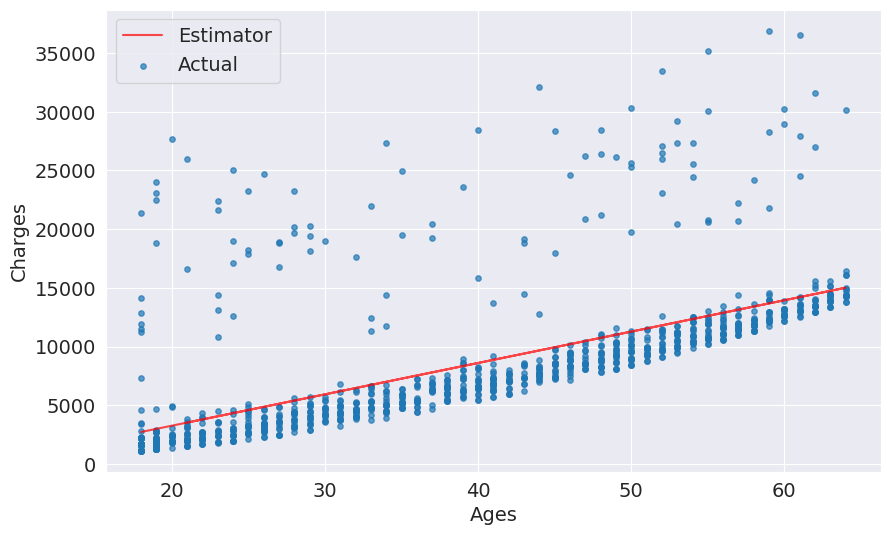

In [ ]:
try_parameter(model.coef_,model.intercept_)

### Stochastic Gradient Descent

For This we have to use the " SGDRegressor "

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd=SGDRegressor()

SGD Predictions: [3178.43076789 4805.51377515 5619.05527878 ... 3178.43076789 3178.43076789
 3666.55567007]
SGD Loss (RMSE): 5201.891447773255


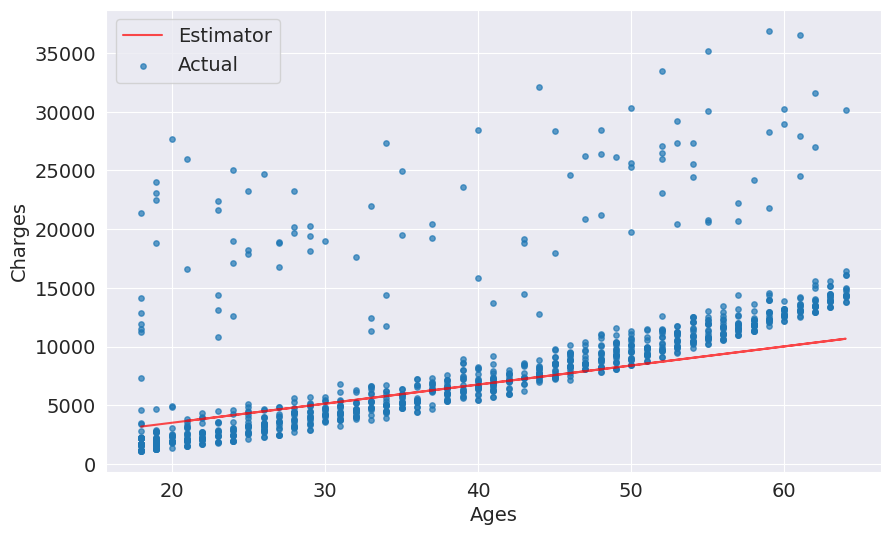

In [ ]:
# prompt: class from scikit-learn to train a model using the stochastic gradient descent technique. Make predictions and compute the loss.

# Fit the SGDRegressor model
sgd.fit(inputs, targets)

# Make predictions
sgd_predictions = sgd.predict(inputs)

# Compute the loss (RMSE)
sgd_loss = rmse(targets, sgd_predictions)

print("SGD Predictions:", sgd_predictions)
print("SGD Loss (RMSE):", sgd_loss)

try_parameter(sgd.coef_,sgd.intercept_)

### Linear Regression for smoker

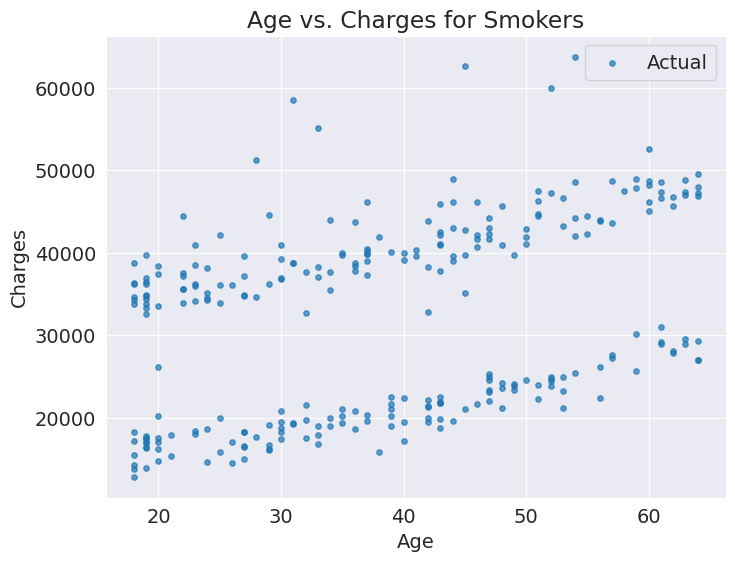

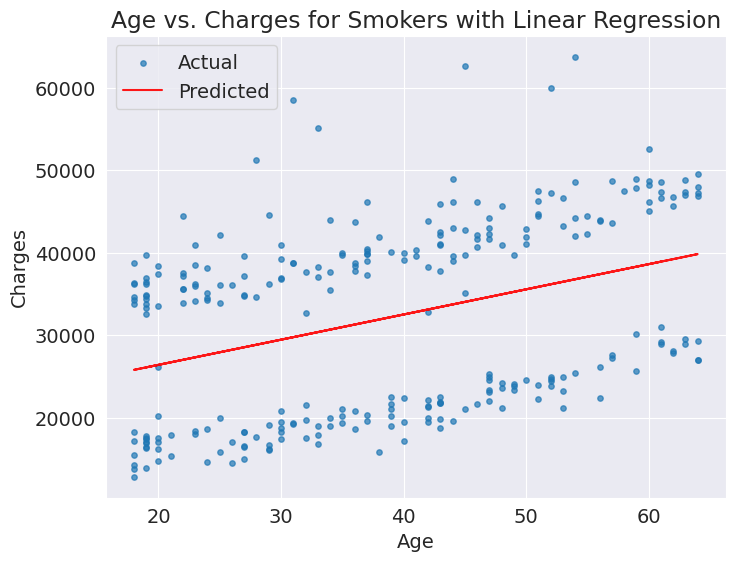

Loss (RMSE) for smokers: 10711.00334810241
Smoker model coefficient: [305.23760211]
Smoker model intercept: 20294.128126915966


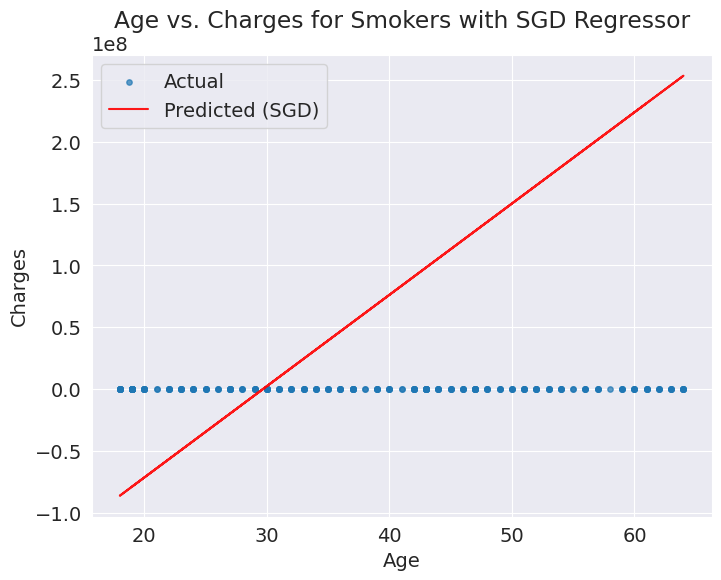

SGD Loss (RMSE) for smokers: 121584190.04164562
Smoker SGD model coefficient: [7386446.35885335]
Smoker SGD model intercept: [-2.19296216e+08]


In [ ]:
# prompt: Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.

import matplotlib.pyplot as plt
# Analyze only for Smokers
smoker_df = medical_df[medical_df.smoker == 'yes']

# Visualize targets and predictions for smokers
plt.figure(figsize=(8, 6))
plt.scatter(smoker_df.age, smoker_df.charges, alpha=0.7, s=15, label='Actual')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges for Smokers')
plt.legend()
plt.show()

# Train Linear Regression model for smokers
smoker_inputs = smoker_df[['age']]
smoker_targets = smoker_df.charges

smoker_model = LinearRegression()
smoker_model.fit(smoker_inputs, smoker_targets)

smoker_predictions = smoker_model.predict(smoker_inputs)

# Visualize targets and predictions
plt.figure(figsize=(8, 6))
plt.scatter(smoker_df.age, smoker_df.charges, alpha=0.7, s=15, label='Actual')
plt.plot(smoker_df.age, smoker_predictions, 'r', alpha=0.9, label='Predicted')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges for Smokers with Linear Regression')
plt.legend()
plt.show()

# Compute the loss (RMSE) for smokers
smoker_loss = rmse(smoker_targets, smoker_predictions)
print('Loss (RMSE) for smokers:', smoker_loss)

# Coefficients and intercept for the smoker model
print('Smoker model coefficient:', smoker_model.coef_)
print('Smoker model intercept:', smoker_model.intercept_)

# Repeat with SGDRegressor
smoker_sgd = SGDRegressor()
smoker_sgd.fit(smoker_inputs, smoker_targets)
smoker_sgd_predictions = smoker_sgd.predict(smoker_inputs)

# Visualize targets and predictions for SGD
plt.figure(figsize=(8, 6))
plt.scatter(smoker_df.age, smoker_df.charges, alpha=0.7, s=15, label='Actual')
plt.plot(smoker_df.age, smoker_sgd_predictions, 'r', alpha=0.9, label='Predicted (SGD)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges for Smokers with SGD Regressor')
plt.legend()
plt.show()

# Compute the loss (RMSE) for SGD on smokers
smoker_sgd_loss = rmse(smoker_targets, smoker_sgd_predictions)
print("SGD Loss (RMSE) for smokers:", smoker_sgd_loss)

# Coefficients and intercept for the smoker SGD model
print('Smoker SGD model coefficient:', smoker_sgd.coef_)
print('Smoker SGD model intercept:', smoker_sgd.intercept_)

###Create a prediction for Age, Bmi and charges

In [ ]:
inputs, targets= non_smoker[['age','bmi']], non_smoker['charges']
model = LinearRegression().fit(inputs, targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print('Loss:',loss)

Loss: 4662.3128354612945


####Corelation Relationship

In [ ]:
display(non_smoker.charges.corr(non_smoker.bmi))

np.float64(0.0840365431283327)

In [ ]:
fig = px.scatter(non_smoker,
                 x='bmi',
                 y='charges',
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
model.coef_,model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

### How to find the linear regression model

Linear regression aims to find a linear relationship between input variables (features) and a target variable. The model is represented by an equation of the form:

$$ \text{target} = w_1 \cdot \text{feature}_1 + w_2 \cdot \text{feature}_2 + \dots + w_n \cdot \text{feature}_n + b $$

where $w_i$ are the coefficients for each feature and $b$ is the intercept.

The `LinearRegression` model from scikit-learn finds the values of $w_i$ and $b$ that minimize the difference between the predicted values and the actual target values.

Here's how you can fit the model and find the coefficients and intercept:

#### Strip Plot

In [ ]:
fig=px.strip(non_smoker,x='children',y='charges')
fig.update_traces(marker_size=5)
fig.show()

To create a model to predict the age,bmi and children with charges

In [ ]:
inputs,targets=non_smoker[['age','bmi','children']],non_smoker['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print('Loss:',loss)

Loss: 4608.470405038247


In [ ]:
px.scatter(medical_df,x='age',y='charges',color='smoker')

### Binary Categories

<Axes: xlabel='smoker', ylabel='charges'>

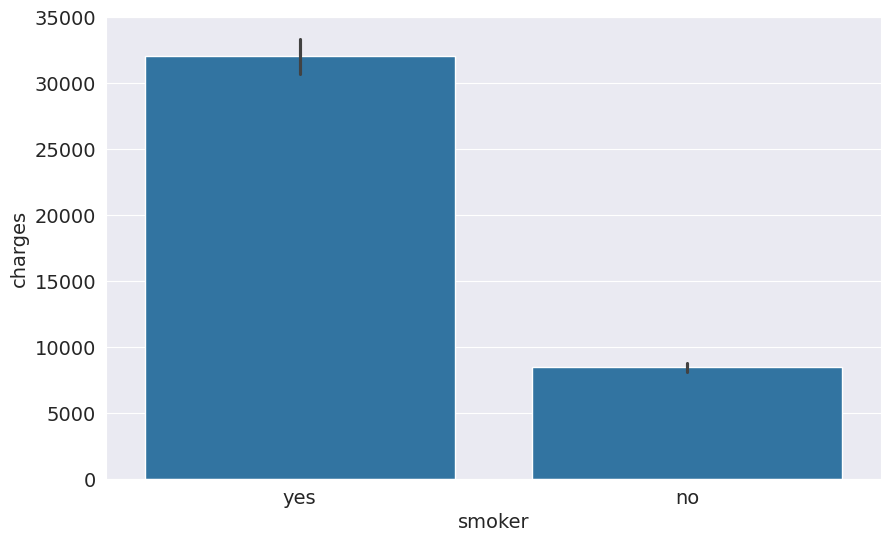

In [ ]:
sns.barplot(medical_df,x='smoker',y='charges')

In [ ]:
average_charges_by_smoker = medical_df.groupby('smoker')['charges'].mean()
display(average_charges_by_smoker)

,charges
smoker,
no,8434.268298
yes,32050.231832


In [ ]:
smoker_codes={'no':0,'yes':1}
smoker_df=medical_df.smoker.map(smoker_codes)

In [ ]:
display(smoker_df)

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
a=medical_df.info()
print(a)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
# Add the 'smoker_codes' column to medical_df
medical_df['smoker_codes'] = medical_df.smoker.map(smoker_codes)

# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_codes']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='region', ylabel='charges'>

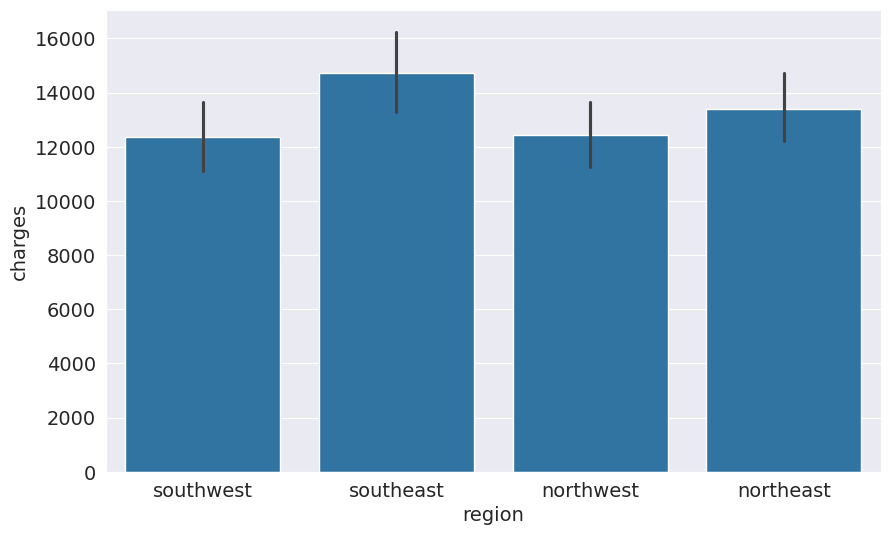

In [ ]:
sns.barplot(medical_df,x='region',y='charges')

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
medical_df['region']

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

To make the new column for region:

In [ ]:
medical_df[['notheast','northwest','southeast','southwest']] = one_hot

Now lets we have to reduce the loss function by using region

In [ ]:
# Add the 'sex_codes' column to medical_df
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

input_cols=['age','bmi','children','smoker_codes','sex_code','notheast','northwest','southeast','southwest']
inputs,targets=medical_df[input_cols],medical_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print('Loss:',loss)

Loss: 6041.6796511744515
